<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib.pyplot as plt

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

plt.style.use('fivethirtyeight')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
# Loading file with csv module

import csv

csv_rows = []
with open('./sat_scores.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        csv_rows.append(row)
f.close()

In [3]:
# Check file data

csv_rows

[['State', 'Rate', 'Verbal', 'Math'],
 ['CT', '82', '509', '510'],
 ['NJ', '81', '499', '513'],
 ['MA', '79', '511', '515'],
 ['NY', '77', '495', '505'],
 ['NH', '72', '520', '516'],
 ['RI', '71', '501', '499'],
 ['PA', '71', '500', '499'],
 ['VT', '69', '511', '506'],
 ['ME', '69', '506', '500'],
 ['VA', '68', '510', '501'],
 ['DE', '67', '501', '499'],
 ['MD', '65', '508', '510'],
 ['NC', '65', '493', '499'],
 ['GA', '63', '491', '489'],
 ['IN', '60', '499', '501'],
 ['SC', '57', '486', '488'],
 ['DC', '56', '482', '474'],
 ['OR', '55', '526', '526'],
 ['FL', '54', '498', '499'],
 ['WA', '53', '527', '527'],
 ['TX', '53', '493', '499'],
 ['HI', '52', '485', '515'],
 ['AK', '51', '514', '510'],
 ['CA', '51', '498', '517'],
 ['AZ', '34', '523', '525'],
 ['NV', '33', '509', '515'],
 ['CO', '31', '539', '542'],
 ['OH', '26', '534', '439'],
 ['MT', '23', '539', '539'],
 ['WV', '18', '527', '512'],
 ['ID', '17', '543', '542'],
 ['TN', '13', '562', '553'],
 ['NM', '13', '551', '542'],
 ['IL

In [4]:
# 1) Extract headers as a list

headers = csv_rows[0]

In [5]:
# 2) Convert elements to integer where possible

converted_list = []

for rows in csv_rows[1:]:
    converted_sublist = []
    for item in rows:
        try:
            converted_sublist.append(int(item))
        except ValueError:
            converted_sublist.append(item)
    converted_list.append(converted_sublist)

In [6]:
# 3) Extract values as a list of list

values = []

for name in headers:
    sublist = []
    for row in converted_list:
        sublist.append(row[headers.index(name)])
    values.append(sublist)
    

In [7]:
# 4) Zip headers and values lists into a dictionary

sat_score_dict = dict(zip(headers,values))

In [8]:
import pprint

pp = pprint.PrettyPrinter(indent=4)
pp.pprint(sat_score_dict)

{   'Math': [   510,
                513,
                515,
                505,
                516,
                499,
                499,
                506,
                500,
                501,
                499,
                510,
                499,
                489,
                501,
                488,
                474,
                526,
                499,
                527,
                499,
                515,
                510,
                517,
                525,
                515,
                542,
                439,
                539,
                512,
                542,
                553,
                542,
                589,
                550,
                545,
                572,
                589,
                580,
                554,
                568,
                561,
                577,
                562,
                596,
                550,
                570,
             

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [9]:
# Make pandas DataFrame object with the SAT dictionary

sat_dict_df = pd.DataFrame(sat_score_dict)
sat_dict_df.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [10]:
# Make pandas DataFrame object with the pandas .read_csv()

sat_csv_df = pd.read_csv('./sat_scores.csv')
sat_csv_df.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

#### <font color='blue'> Answer: There is no difference between the 2 DataFrames based on the .dtypes information </font>

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [11]:
# Rename sat_csv_df to sat for easier coding in next sections
sat = sat_csv_df

In [12]:
sat.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


#### <font color='blue'> Answer: The data describes the SAT score results by each of the US States. 

</font>

In [13]:
# Examining and cleaning DataFrame
sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


In [14]:
# There are 50 states + DC + Puerto Rico in the US
# Check if the State value in the rows contain the 50 states + DC + Puerto Rico

us_states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY" , "PR"]

sat[~sat['State'].isin(us_states)]

,State,Rate,Verbal,Math
51,All,45,506,514


In [15]:
# Remove the row that does not contain result from the set of US States since 
# we are unable to determine if this is an error. 

sat_clean = sat.iloc[:51,:]
sat_clean

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [16]:
# Check the DataFrame
sat_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
State     51 non-null object
Rate      51 non-null int64
Verbal    51 non-null int64
Math      51 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


In [17]:
# Check the DataFrame
sat_clean.shape

(51, 4)

#### <font color='blue'> Data Dictionary:</font>

<font color='blue'> There are 52 rows and 4 columns in this DataFrame describing the SAT score results by state 

<font color='blue'> State -    US State (String)
    
<font color='blue'> Rate -     Assume that it is the improvement in score from the last year (integer)
    
<font color='blue'> Verbal -   Score for Evidence-Based Reading and Writing (EBRW), ranging from 200 to 800 (integer)
    
<font color='blue'> Math -     Score for Math, ranging from 200 to 800 (integer)



<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

Text(0.5, 1.0, 'Distribution for Rate')

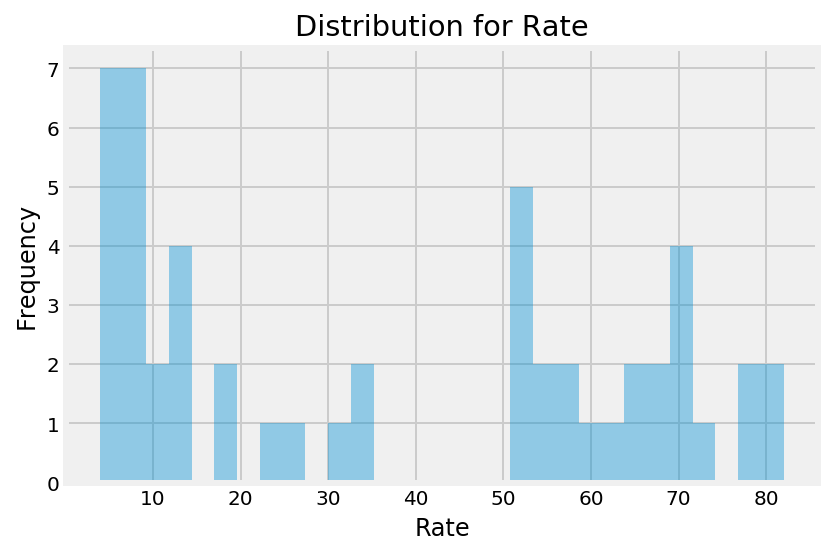

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

# Plot distribution for Rate

sns.distplot(sat_clean['Rate'], kde=False, bins = 30)
plt.ylabel('Frequency')
plt.title('Distribution for Rate')

Text(0.5, 1.0, 'Distribution for Verbal')

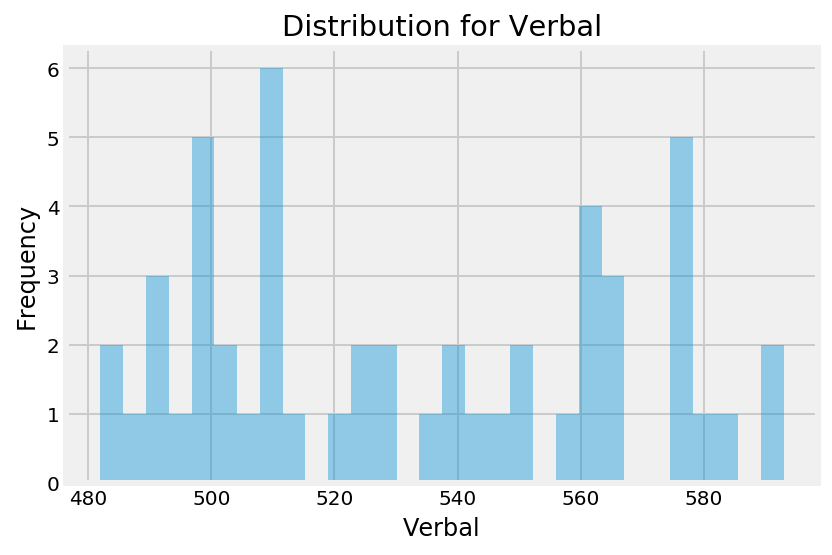

In [19]:
# Plot distribution for Verbal

sns.distplot(sat_clean['Verbal'], kde=False, bins = 30)
plt.ylabel('Frequency')
plt.title('Distribution for Verbal')

Text(0.5, 1.0, 'Distribution for Math')

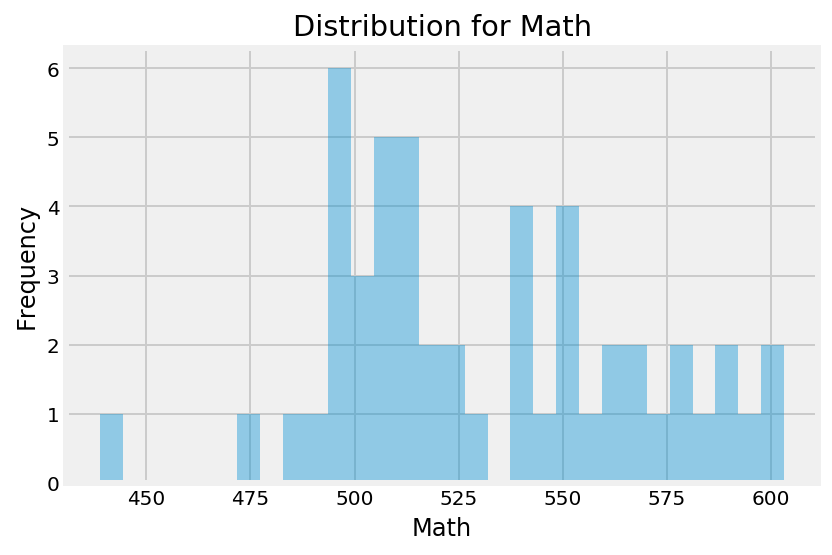

In [20]:
# Plot distribution for Math

sns.distplot(sat_clean['Math'], kde=False, bins = 30)
plt.ylabel('Frequency')
plt.title('Distribution for Math')

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

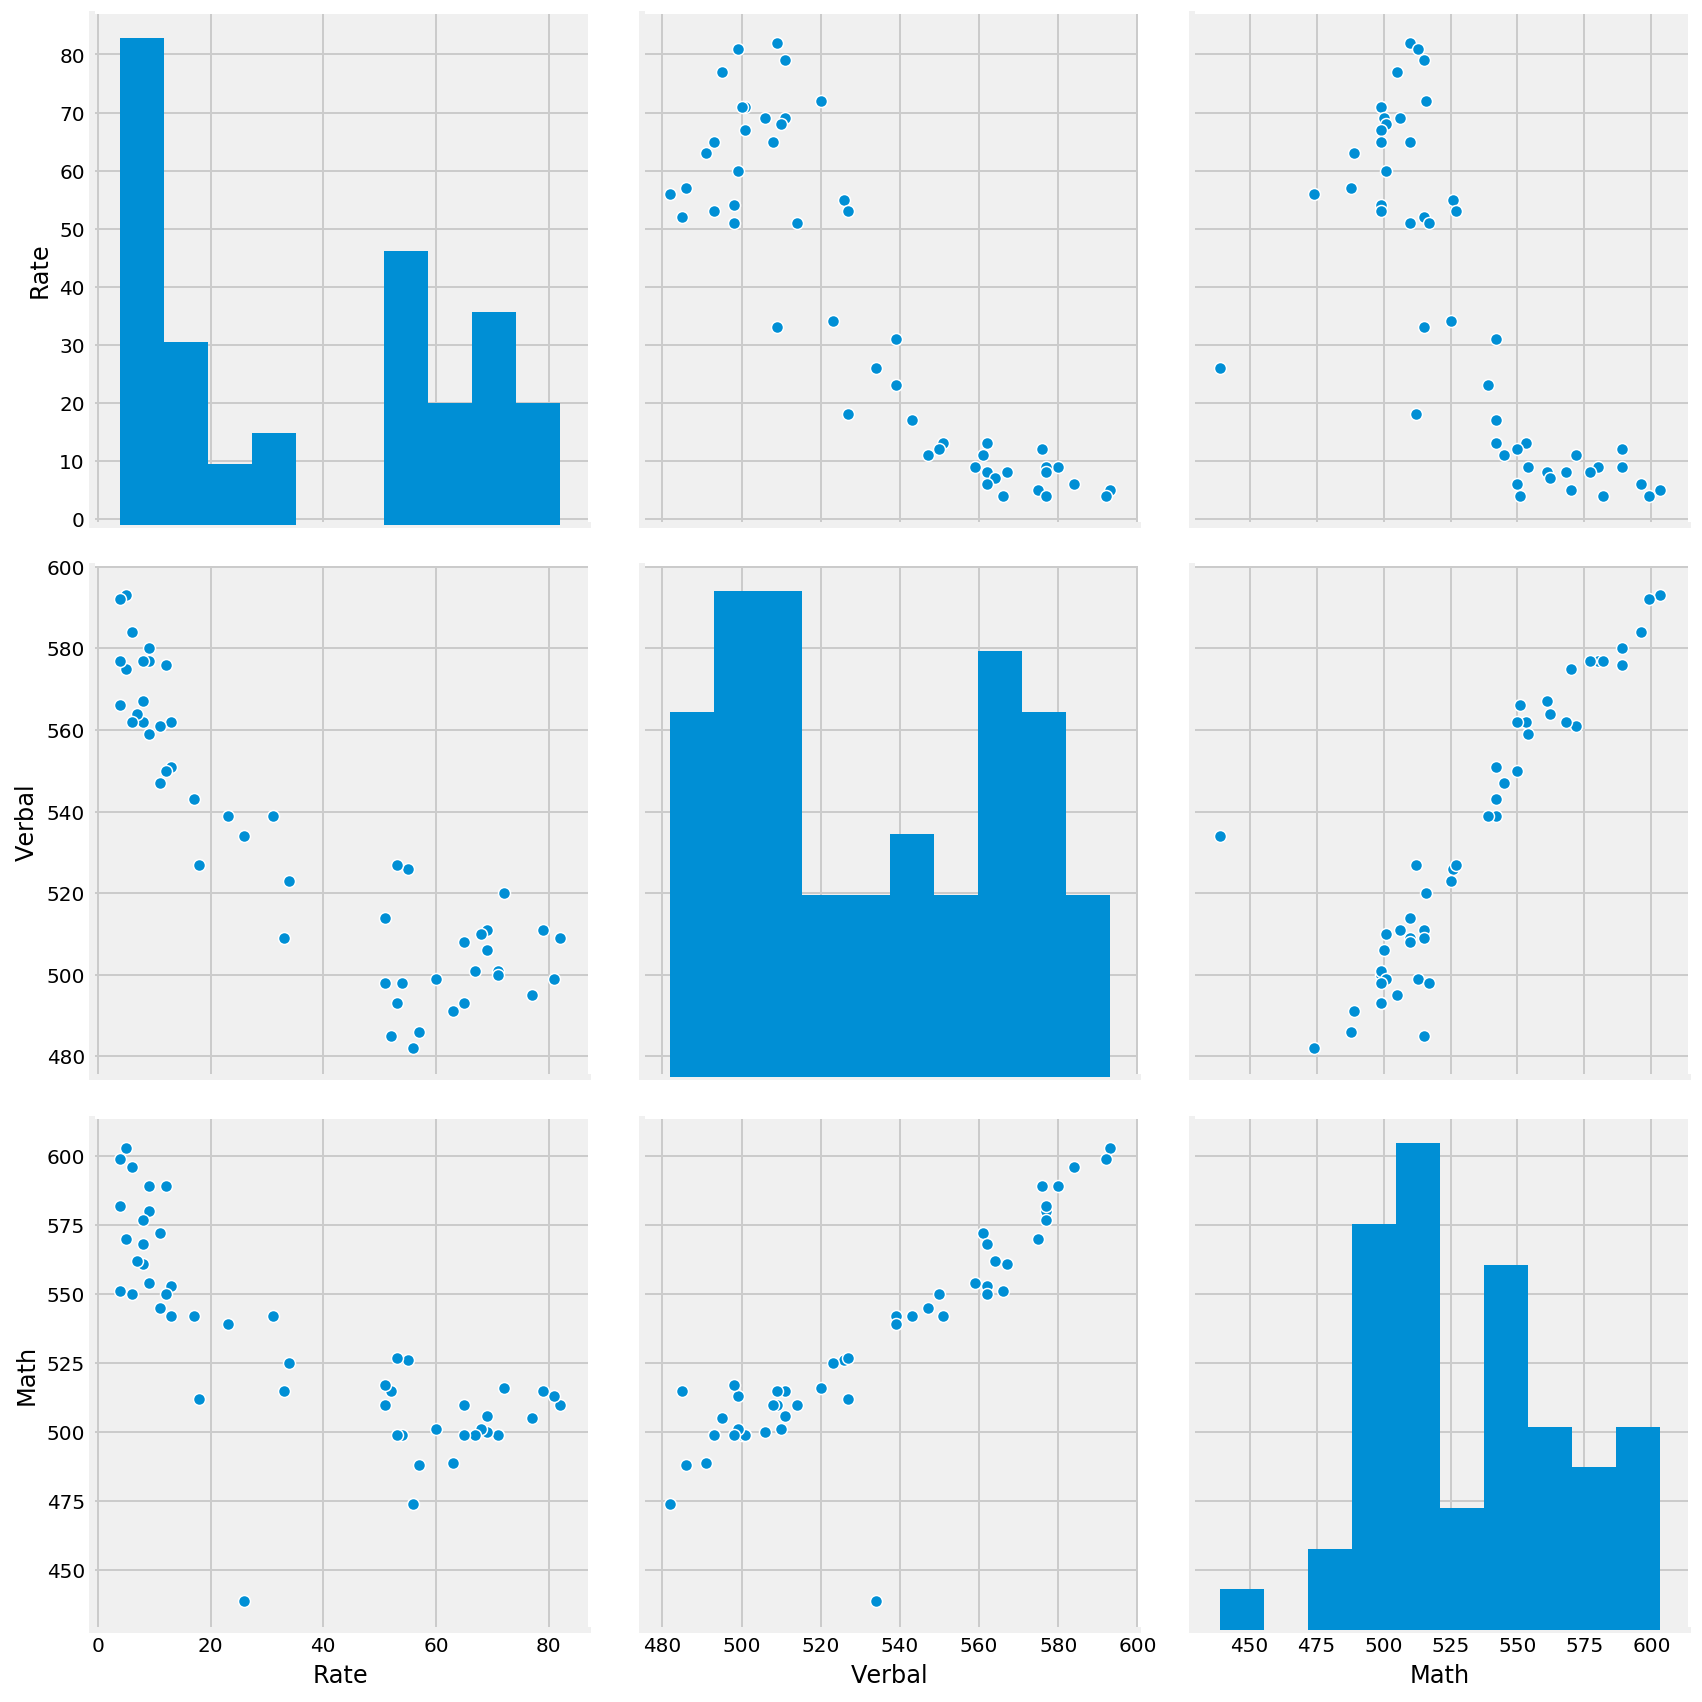

In [21]:
sns.pairplot(sat_clean, height=4)

#### <font color='blue'> Answer:
    
<font color='blue'> 

1) From the scatterplot, there seems to be a strong correlation between Verbal and Math scores

2) On the other hand, the Rate vs Math and Verbal scores seem to be negatively correlated

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

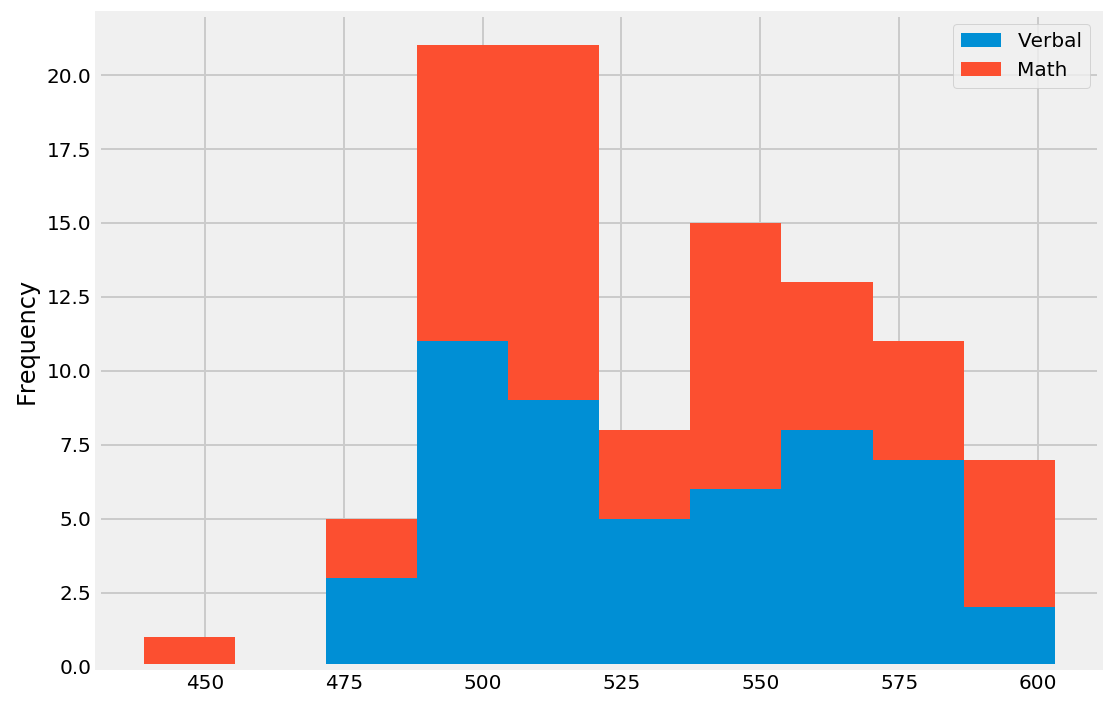

In [22]:
# Plot a stacked histogram

sat_clean[['Verbal','Math']].plot(kind='hist', stacked=True, figsize = (8,6), grid=True)

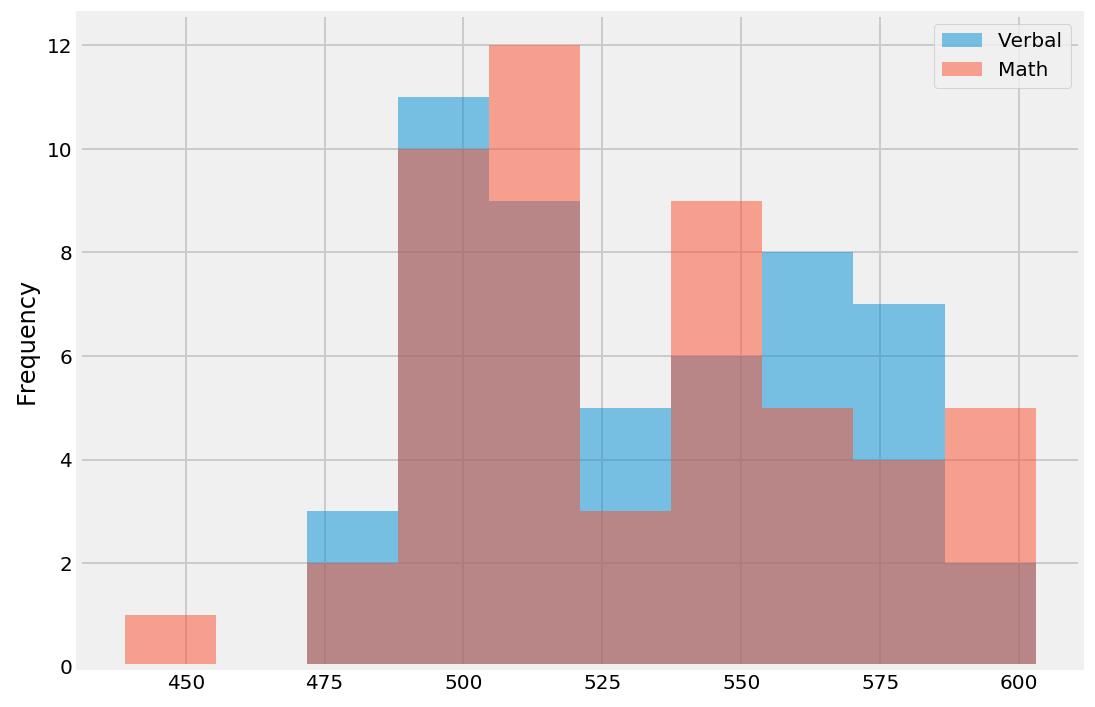

In [23]:
# As the information from stacked histogram is not very clear and easy to read, I have plotted 2 histograms overlapping. 

sat_clean[['Verbal','Math']].plot(kind='hist', alpha=0.5, figsize = (8,6), grid=True)

<font color='blue'> 

The distribution of the Verbal and Math scores seem to be relatively similar from the Histograms above. This could explain why there is a positive correlation between Verbal and Math score as seen from the scatterplot above.

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

Text(0, 0.5, 'Score')

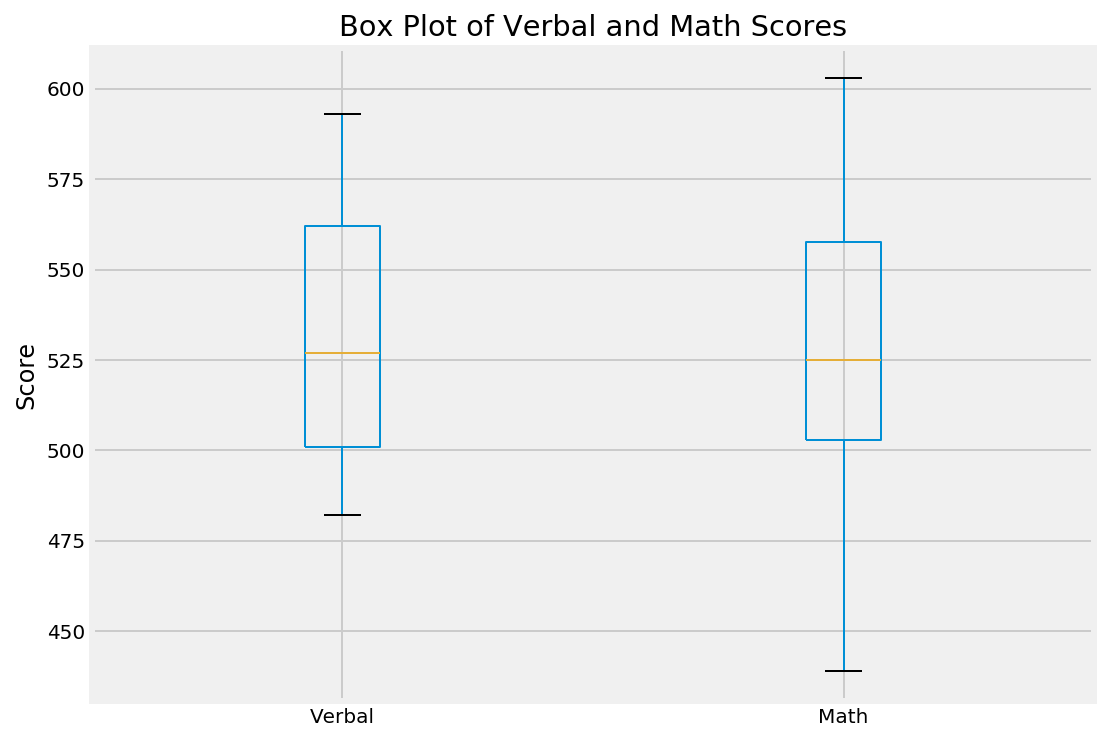

In [24]:
ax = sat_clean[['Verbal','Math']].plot(kind = 'box', figsize = (8,6),\
                            title = 'Box Plot of Verbal and Math Scores')
ax.set_ylabel("Score")

####  <font color='blue'> Answer: 
<font color='blue'> Box plot shows the distribution and min and max of the data more clearly, so we can easily identify outliers. We can also see how the mean of the 2 variables compare to each other.
    
The y-axis values of Rate vary too much from Math and Verbal, and is not on the same scale. </font>

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


####  <font color='blue'> Answer: 
<font color='blue'>To put all the variables on the same chart, we can normalize the values so the values will be on the same scale. To do that, we can take use the following formula:

(x - mean) / standard deviation

In [25]:
# Normalize the entire dataset other than the age variable

sat_norm = sat_clean.iloc[:,1:4].copy()
sat_norm = (sat_norm - sat_norm.mean())/sat_norm.std()

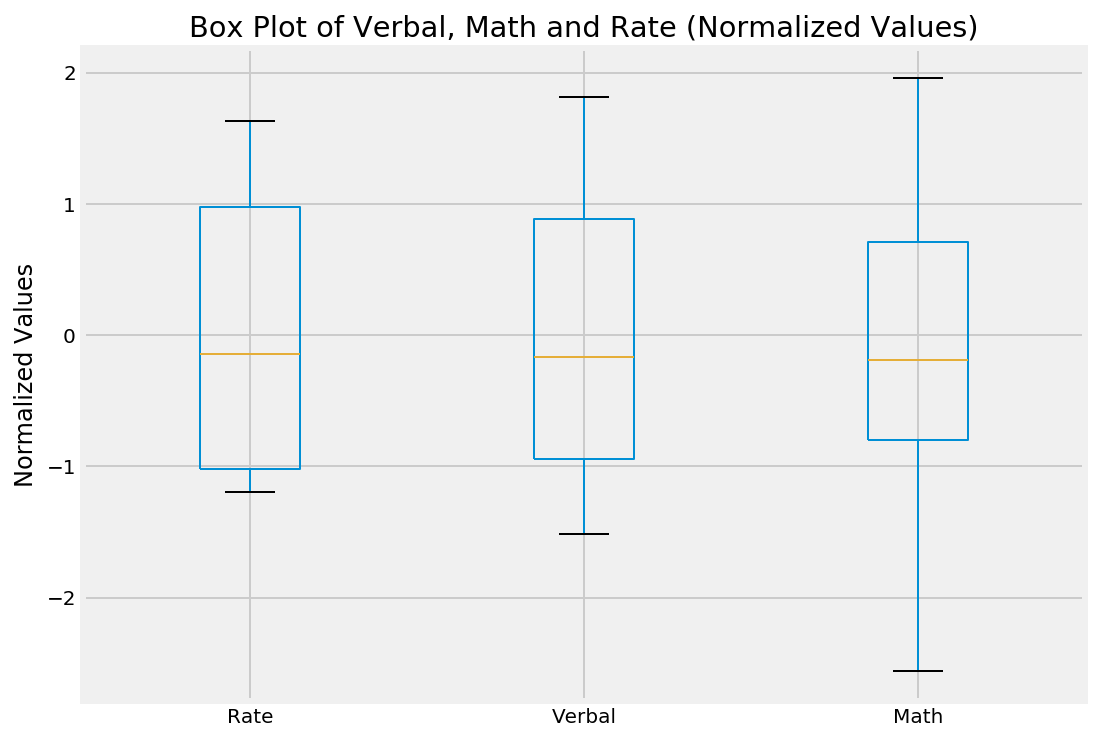

In [26]:
# Plot Verbal, Math and Rate on the same boxplot

ax = sat_norm.plot(kind = 'box', figsize = (8,6),\
                            title = 'Box Plot of Verbal, Math and Rate (Normalized Values)')
ax.set_ylabel("Normalized Values")
plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [27]:
# List of states that have Verbal scores higher than the average Verbal scores across states

sat_clean[sat_clean['Verbal'] > sat_clean['Verbal'].mean()]

,State,Rate,Verbal,Math
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550
35,WY,11,547,545
36,MI,11,561,572


In [28]:
# No. of states with Verbal score above average

sat_clean[sat_clean['Verbal'] > sat_clean['Verbal'].mean()]['State'].count()

24

In [29]:
# Mean of verbal variable

sat_clean['Verbal'].mean()

532.5294117647059

#### <font color='blue'> Answer:
<font color='blue'> The distribution of Verbal score is just slightly right skewed. If the distribution was symmetric, there should be 25 states with Verbal score higher than average. The mean is larger than the median.

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [30]:
# List of states that have Verbal scores higher than the median Verbal scores across states

sat_clean[sat_clean['Verbal'] > sat_clean['Verbal'].median()]

,State,Rate,Verbal,Math
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550
35,WY,11,547,545
36,MI,11,561,572


In [31]:
# No. of states with Verbal score above median

sat_clean[sat_clean['Verbal'] > sat_clean['Verbal'].median()]['State'].count()

24

In [32]:
# Median of Verbal score

sat_clean['Verbal'].median()

527.0

#### <font color='blue'> Answer:
<font color='blue'> This list returns the same number of values as the list comparing values larger than mean. This is because the median is 527 and there are 2 rows with 527. As we are looking for values larger than the median of 527, the list returned is exactly the same as the list comparing values larger than mean.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [33]:
# Add a column for the difference between Verbal and Math scores
sat_clean['Verbal-Math'] = sat_clean['Verbal'] - sat_clean['Math']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [34]:
# Check DataFrame
sat_clean.head()

,State,Rate,Verbal,Math,Verbal-Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [35]:
# DataFrame with 10 states with greatest gap between Verbal and Math scores (Verbal > Math)

sat_diff_verbal = sat_clean[sat_clean['Verbal-Math'] > 0].sort_values(by = 'Verbal-Math', ascending = False).head(10)

In [36]:
# DataFrame with 10 states with greatest gap between Math and Verbal scores (Math > Verbal)

sat_diff_math = sat_clean[sat_clean['Verbal-Math'] < 0].sort_values(by = 'Verbal-Math').head(10)

In [37]:
# Top 3 States with greatest gap between Verbal and Math scores (Verbal > Math)

sat_diff_verbal.head(3)

,State,Rate,Verbal,Math,Verbal-Math
27,OH,26,534,439,95
29,WV,18,527,512,15
50,MS,4,566,551,15


In [38]:
# Top 3 States with greatest gap between Verbal and Math scores (Math > Verbal)

sat_diff_math.head(3)

,State,Rate,Verbal,Math,Verbal-Math
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [39]:
sat_clean.corr()

,Rate,Verbal,Math,Verbal-Math
Rate,1.000000,-0.888121,-0.773419,-0.098671
Verbal,-0.888121,1.000000,0.899909,0.044527
Math,-0.773419,0.899909,1.000000,-0.395574
Verbal-Math,-0.098671,0.044527,-0.395574,1.000000


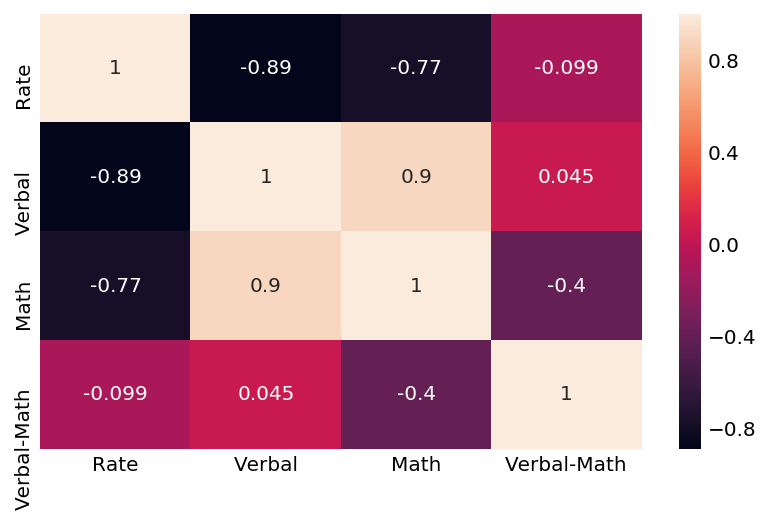

In [40]:
sns.heatmap(sat_clean.corr(), annot=True)

####  <font color='blue'> Answer:

<font color='blue'> 

1) Confirms the observation earlier that there is a strong positive correlation between the Math and Verbal variable. This is indicated by the high correlation coefficient of 0.9.

<font color='blue'> 

2) Confirms that there is a negative correlation between the Math and Verbal score and the Rate. 
- The negative correlation between Rate and Verbal score is strong at -0.89.
- The negative correlation between Rate and Math is slightly weaker, but still relatively strong at -0.77.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [41]:
sat_clean.describe()

,Rate,Verbal,Math,Verbal-Math
count,51.000000,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137,0.686275
std,27.550681,33.360667,36.287393,15.839811
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,503.000000,-6.000000
50%,33.000000,527.000000,525.000000,0.000000
75%,64.000000,562.000000,557.500000,4.500000
max,82.000000,593.000000,603.000000,95.000000


####  <font color='blue'> Answer:

<font color='blue'> 

Count: There are 51 value counts for each of the variables.

Mean: This shows the average of the values for each of the variables. 

Std: This shows the standard deviation for each of the variables. 

Min: This represents the minimum value in the range of the dataset. 

25%: This represents the 75th percentile of the dataset. 

50%: This shows the middle value in the set of values arranged in ascending order. This is a particularly useful value is we suspect that there is an outlier in the dataset. For datasets where mean = median, it is a likely indication that the distribution is symmetric.

75%: This represents the 75th percentile of the dataset. 

Max: This represents the maximum value in the range of the dataset. 


In [42]:
sat_clean['State'].describe()

count     51
unique    51
top       DE
freq       1
Name: State, dtype: object

####  <font color='blue'> Answer:

<font color='blue'> 

There are 51 unique values for the variable States. Each of these values only have 1 count. 

As they are strings and not numeric values, there is no summary statistic of mean and median available. 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [43]:
# Find the covariance for the dataset 

sat.cov()

,Rate,Verbal,Math
Rate,745.387632,-804.355958,-760.803922
Verbal,-804.355958,1104.646682,1077.147059
Math,-760.803922,1077.147059,1297.078431


####  <font color='blue'> Answer:

<font color='blue'> 1) Covariance indicates how two variables are related. A positive covariance means the variables are positively related, while a negative covariance means the variables are negatively related. 
Unlike correlation, covariance does not adjust for variances of the variable and hence the absolute value of the covariance does not tell the degree to which the variables move together. 
    
2) To convert covariance to correlation, we divide the covariance by the standard deviation of the variables, to standardize the units of measurement of the variables.

<font color='blue'> 
3) The correlation matrix is preferred to the covariance matrix as it gives information about the degree of interdependence between two variables. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [44]:
# Load the data using Pandas

drug_use = './drug-use-by-age.csv'
drug = pd.read_csv(drug_use)

In [45]:
# Examine the dataframe

drug.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [46]:
# Examine the dataframe

drug.tail()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
12,26-29,2628,80.7,52.0,20.8,52.0,3.2,5.0,0.4,6.0,...,1.2,13.5,4.2,10.0,2.3,7.0,0.6,30.0,0.4,4.0
13,30-34,2864,77.5,52.0,16.4,72.0,2.1,8.0,0.5,15.0,...,0.9,46.0,3.6,8.0,1.4,12.0,0.4,54.0,0.4,10.0
14,35-49,7391,75.0,52.0,10.4,48.0,1.5,15.0,0.5,48.0,...,0.3,12.0,1.9,6.0,0.6,24.0,0.2,104.0,0.3,10.0
15,50-64,3923,67.2,52.0,7.3,52.0,0.9,36.0,0.4,62.0,...,0.4,5.0,1.4,10.0,0.3,24.0,0.2,30.0,0.2,104.0
16,65+,2448,49.3,52.0,1.2,36.0,0.0,-,0.0,-,...,0.0,-,0.2,5.0,0.0,364.0,0.0,-,0.0,15.0


In [47]:
# Examine the dataframe

drug.shape

(17, 28)

In [48]:
# Examine the dataframe

drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

#### <font color='blue'> Observations:
    
<font color='blue'> 
1) All the values are non-null according to the .info output for the dataset.

2) Some of the values that should be floats are currently in object type e.g. cocaine-frequency, crack-frequency, heroin-frequency, inhalant-frequency, oxycontin-frequency, meth-frequency. There is likely a string object hidden in the values. This will affect the plots when doing EDA as the values cannot be read properly. We will need to convert those values to floats.

<font color='blue'> 
    
3) The spelling for pain-reliever is wrong. We should change the spelling of the affected columns

In [49]:
# Check why the column heroin-frequency is object type

drug['heroin-frequency'].unique()

# There are values which are '-'. This should be the same for the other affected columns 
# e.g. inhalant-frequency, oxycontin-frequency, meth-frequency

array(['35.5', '-', '2.0', '1.0', '66.5', '64.0', '46.0', '180.0', '45.0',
       '30.0', '57.5', '88.0', '50.0', '66.0', '280.0', '41.0', '120.0'],
      dtype=object)

In [50]:
# Create a function to convert to float 
def convert_float(x):
    x = float(x)
    return x

# Create function to change the column values and convert to float

def cleaning(dataframe,column_name):
    dataframe[column_name] = dataframe[column_name].map(lambda x: x.replace('-','0'))
    dataframe[column_name] = dataframe[column_name].map(lambda x: convert_float(x))

In [51]:
# Clean the object values in all the affected columns 
cleaning(drug,'cocaine-frequency')
cleaning(drug,'crack-frequency')
cleaning(drug,'heroin-frequency')
cleaning(drug,'inhalant-frequency')
cleaning(drug,'oxycontin-frequency')
cleaning(drug,'meth-frequency')

In [52]:
# Change spelling of columns relating to pain-reliever

drug.rename(columns = {'pain-releiver-use': 'pain-reliever-use', 'pain-releiver-frequency': 'pain-reliever-frequency'}, inplace=True)

#### <font color='blue'> Observations:
    
<font color='blue'> 4) For the age variable, there are some ages that are listed as a range e.g. 22-23. This limits the ability to do EDA (for correlation) on the variable since the values are not numeric.
To overcome this, we should will come up a new dataframe and convert the range to a numeric value. We will use the lowest value in each range just as an approximation to represent the range for the purpose of this study

In [53]:
print(list(drug['age']))

['12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22-23', '24-25', '26-29', '30-34', '35-49', '50-64', '65+']


In [54]:
# Prepare new dataframe 1
    # Replace age range with a numeric value 
    # As there are only a few values to revise, I will do this manually

drug_alt = drug.copy()
drug_alt['age'] = ['12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '24', '26', '30', '35', '50', '65']

# Convert the age series to integers
drug_alt['age'] = drug_alt['age'].map(lambda x: int(x))

#### <font color='blue'> Observations:
    
<font color='blue'> 5) The values for the different variables are on different scales. To facilitate comparison across different variables on the same scale thereafter, I will normalize the dataset as well.


In [55]:
# Normalize the entire dataset other than the age variable

drug_norm = drug.iloc[:,2:].copy()
drug_norm = (drug_norm - drug_norm.mean())/drug_norm.std()

# Change the index of the dataset to age so that we can use that for plotting thereafter

drug_norm.index = drug['age']

In [56]:
drug_norm

,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
age,,,,,,,,,,,,,,,,,,,,,
12,-1.917098,-1.423762,-1.490293,-2.120683,-1.142945,-0.300939,-1.247469,-0.713206,-0.757849,-0.477106,...,-1.373352,0.818378,-1.486206,3.505789,-1.220203,-0.339023,-1.455128,-0.985372,-0.596759,-0.257006
13,-1.745959,-1.283041,-1.297981,-1.521638,-1.142945,-0.800059,-1.247469,-0.540410,-1.057464,-0.983141,...,-1.373352,2.097236,-1.429173,1.198473,-1.149164,-0.315760,-1.074556,-0.830123,-1.321394,-0.015397
14,-1.388802,-1.329948,-0.854828,-1.031510,-1.142945,-0.238550,-1.247469,-0.713206,-0.757849,-0.954632,...,-0.880106,-0.731753,-1.086977,-0.586432,-0.793968,-0.222708,-1.074556,-0.240179,-0.596759,-0.116067
15,-0.975838,-1.283041,-0.369868,-0.977052,-0.922774,-0.425719,-0.823329,-0.166020,-0.458234,-0.968887,...,-0.222444,-0.848013,-0.459617,-0.629966,-0.296693,-0.292497,-0.313412,-0.659350,0.852512,0.427553
16,-0.570315,-1.095414,0.299042,-0.704759,-0.647561,-0.051380,-1.247469,-0.655608,-0.757849,-0.035217,...,0.270802,-0.770506,-0.231486,-0.064021,-0.083576,-0.251787,-0.313412,0.132418,-0.596759,-0.659687
17,-0.228038,-0.954693,0.758918,-0.378007,-0.097134,-0.300939,-0.823329,0.496364,-0.757849,-0.070853,...,0.764048,-0.615493,0.395874,-0.412295,0.626817,-0.257602,0.828303,0.505014,1.577148,-0.518748
18,0.121679,-0.438717,1.235516,0.493331,0.563378,-0.300939,0.449089,-0.137220,0.140995,-0.327434,...,1.257294,-0.537987,1.194333,0.023048,0.768895,-0.269234,0.447732,-0.612775,0.852512,-0.377810
19,0.341182,0.124165,1.210432,0.929000,1.058762,-0.238550,0.873228,-0.598009,0.440610,1.582669,...,0.928463,-0.499233,0.795103,-0.629966,0.982013,-0.292497,0.067160,2.274848,0.127877,-0.538883
20,0.530922,0.687048,1.260601,0.929000,1.499103,0.073400,1.297367,-0.425213,1.639069,-0.341689,...,1.257294,-0.150454,1.479496,-0.151090,1.479287,-0.222708,1.970019,-0.612775,1.577148,-0.619419


### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

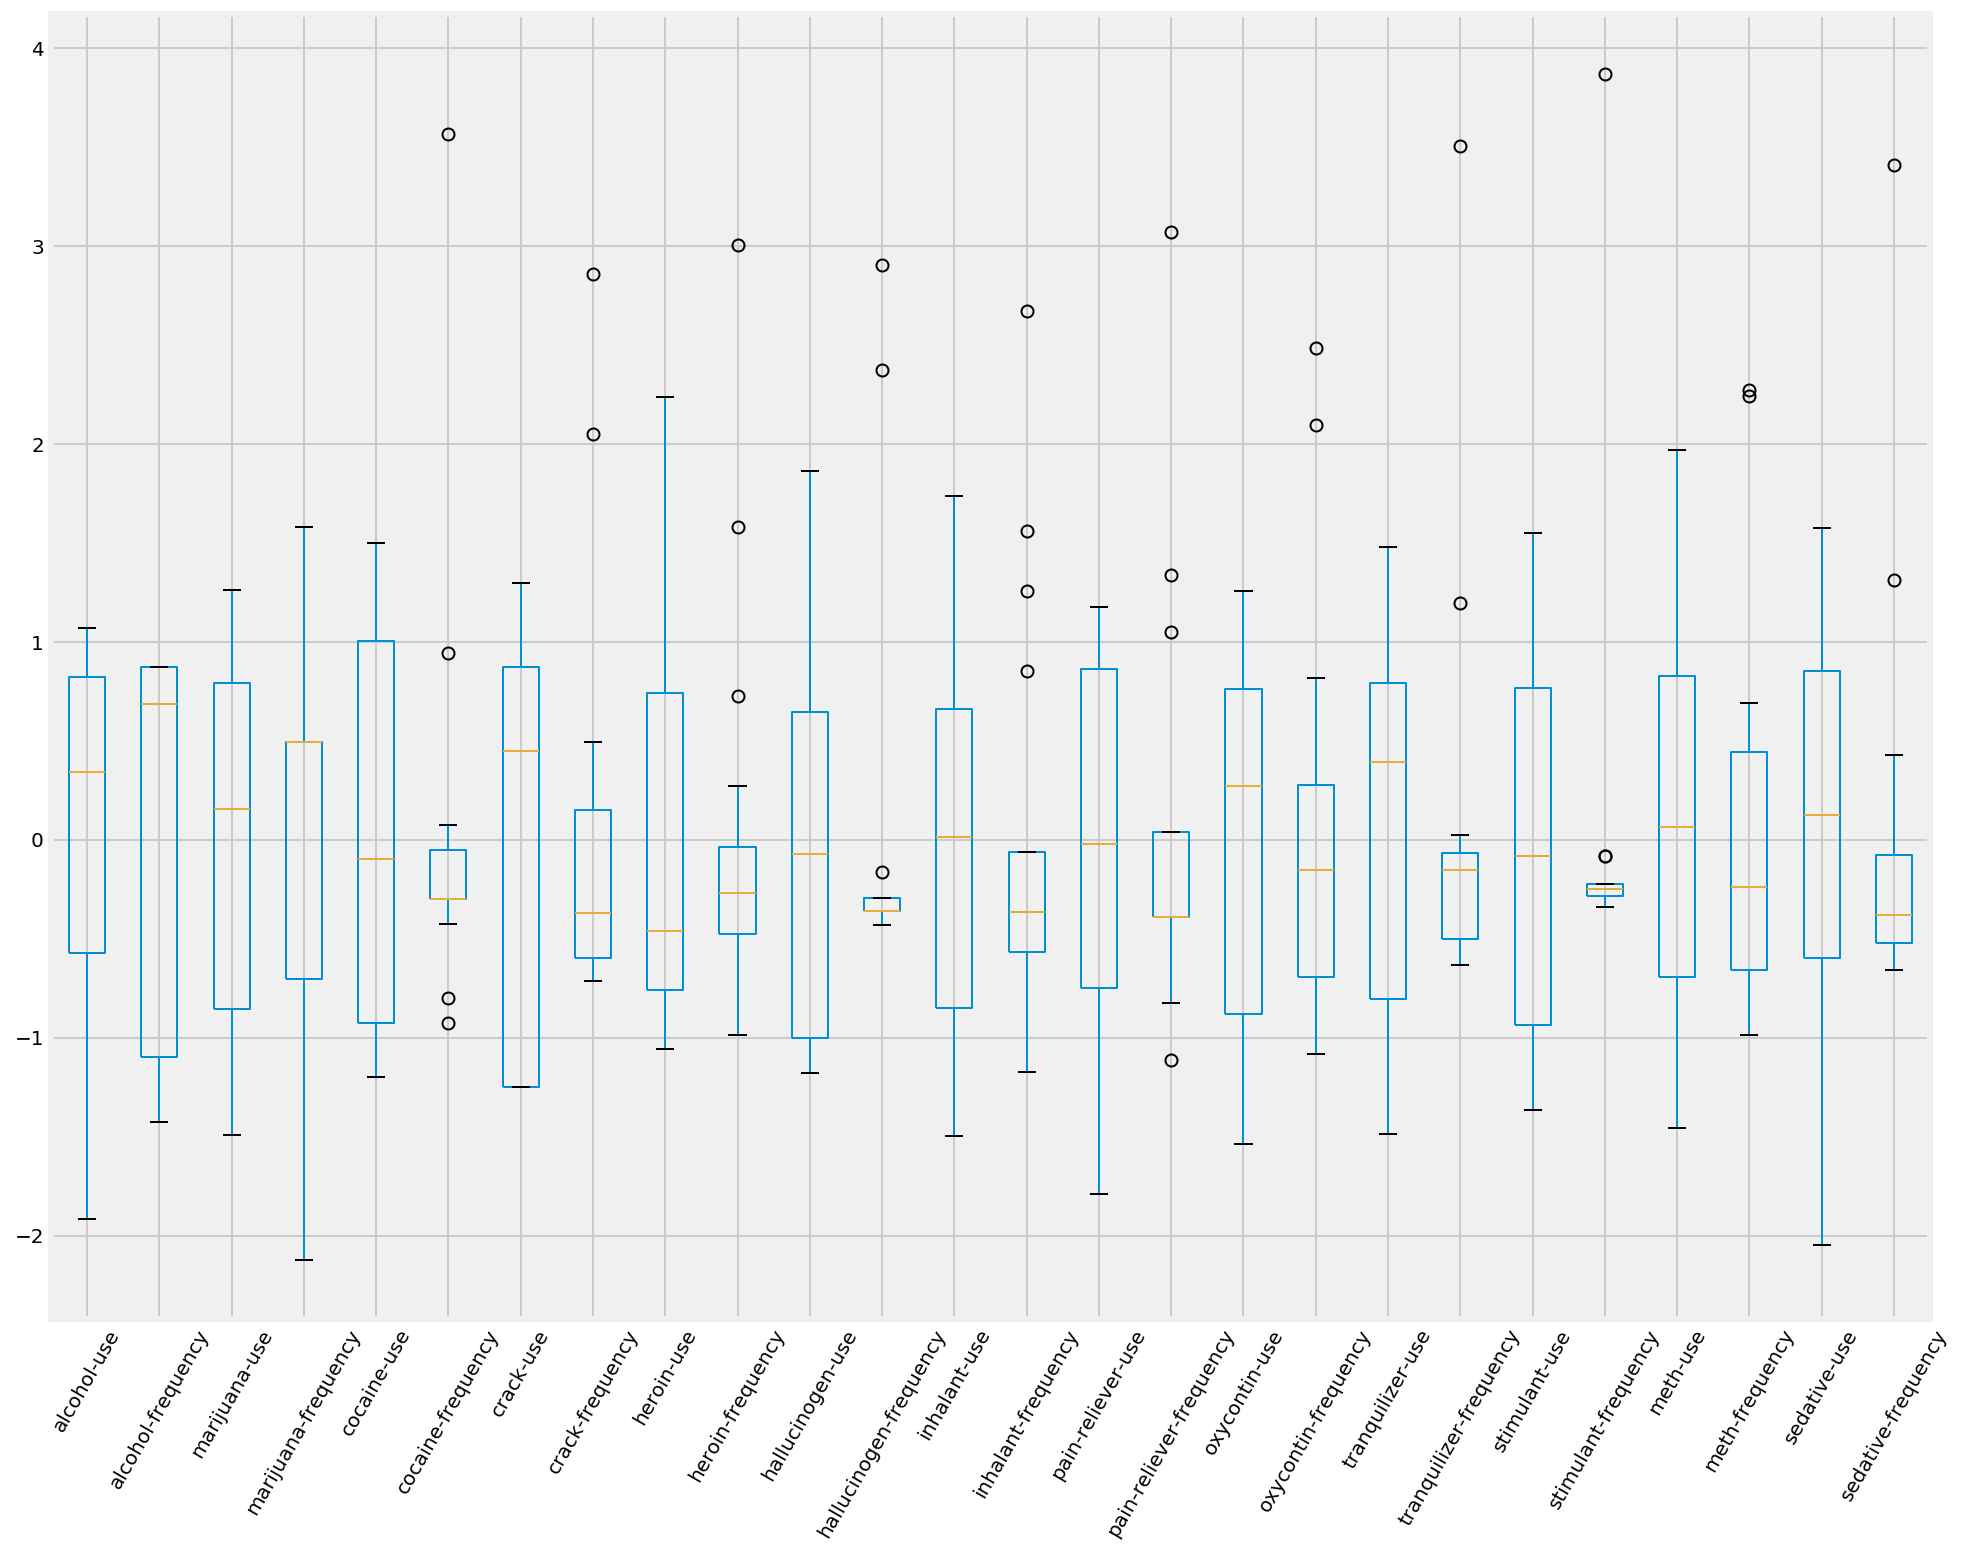

In [57]:
# Use a box plot to check for outliers

drug_norm.plot(kind='box',figsize=(15,12),rot=60)

#### <font color='blue'> Observations:
    
<font color='blue'> 1) There are large outliers for most of the -frequency variables, especially stimulant-frequency, cocaine-frequency and traquilizer-frequency. We should bear this in mind when analyzing the -frequency variables later.

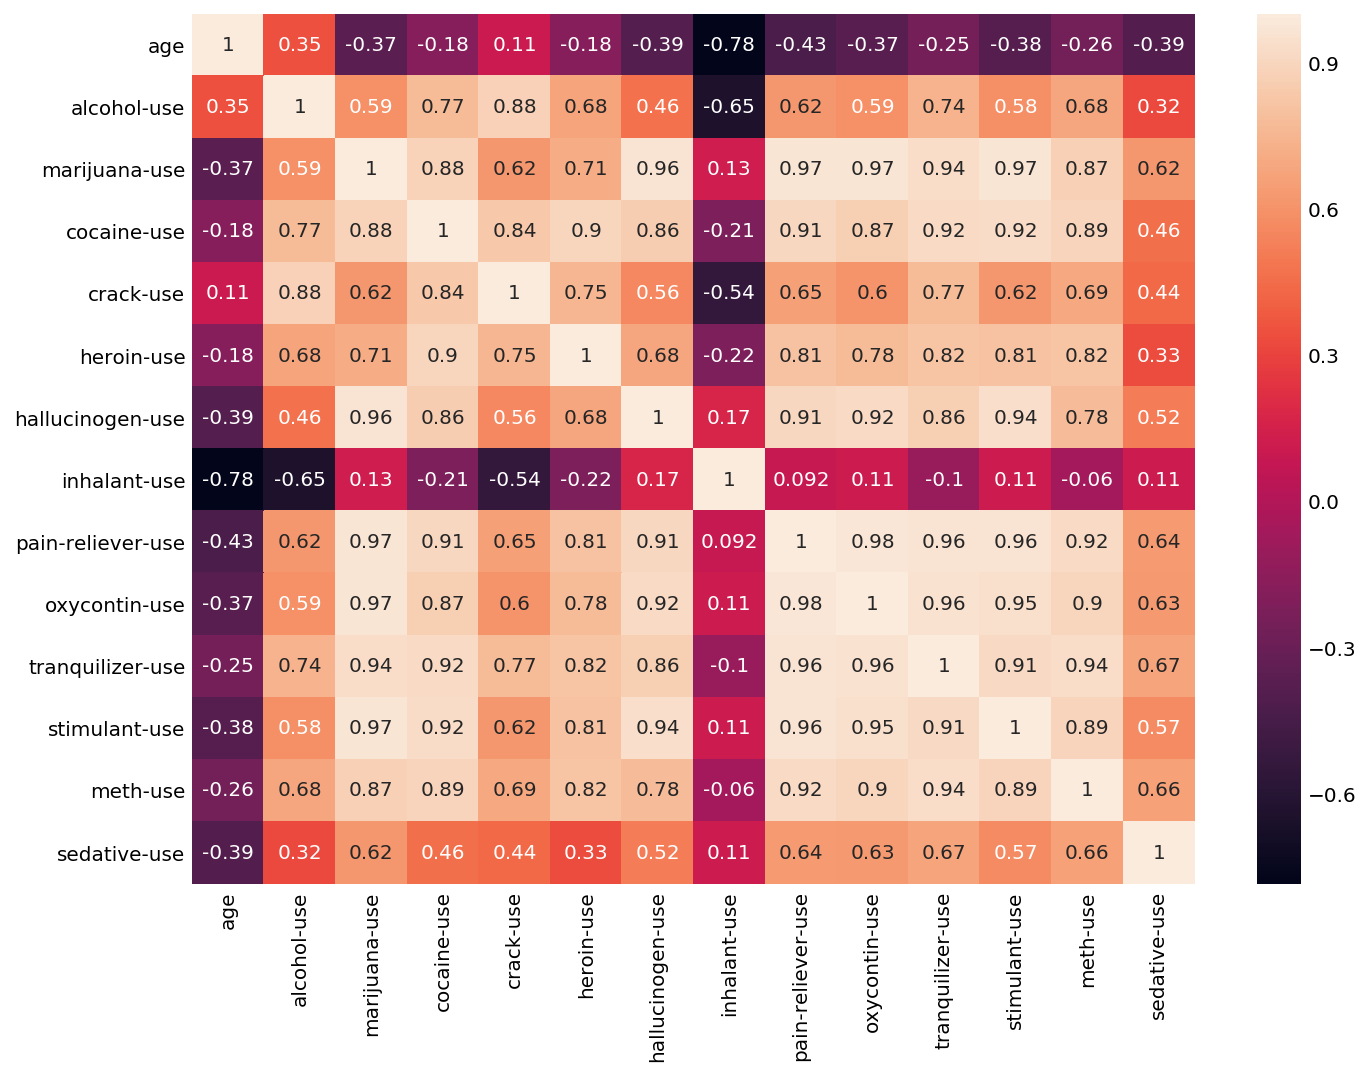

In [58]:
# Check the general correlation of the variables -use, to see if there could be any relationship

drug_alt_use = drug_alt.iloc[:,range(0,28,2)]

plt.figure(figsize = (10,8))
sns.heatmap(drug_alt_use.corr(), annot=True)

#### <font color='blue'> Observations:

<font color='blue'> 
2) There seems to be a general negative correlation between age and percentage of drug users in the age group, however the correlation is not strong.
    
3) There seems to be a general positive correlation between the percentage of drug users for each drug, other than inhalant use. e.g. when there are more drug users for alcohol, there are also more drug users for marijuana. 

Majority of the variables of drug use show a relatively strong correlation with a correlation coefficient between 0.7 to 0.98. However, the percentage of inhalant users shows an especially weak correlation with the percentage of users of other drugs. ___This could be an area to look into.___






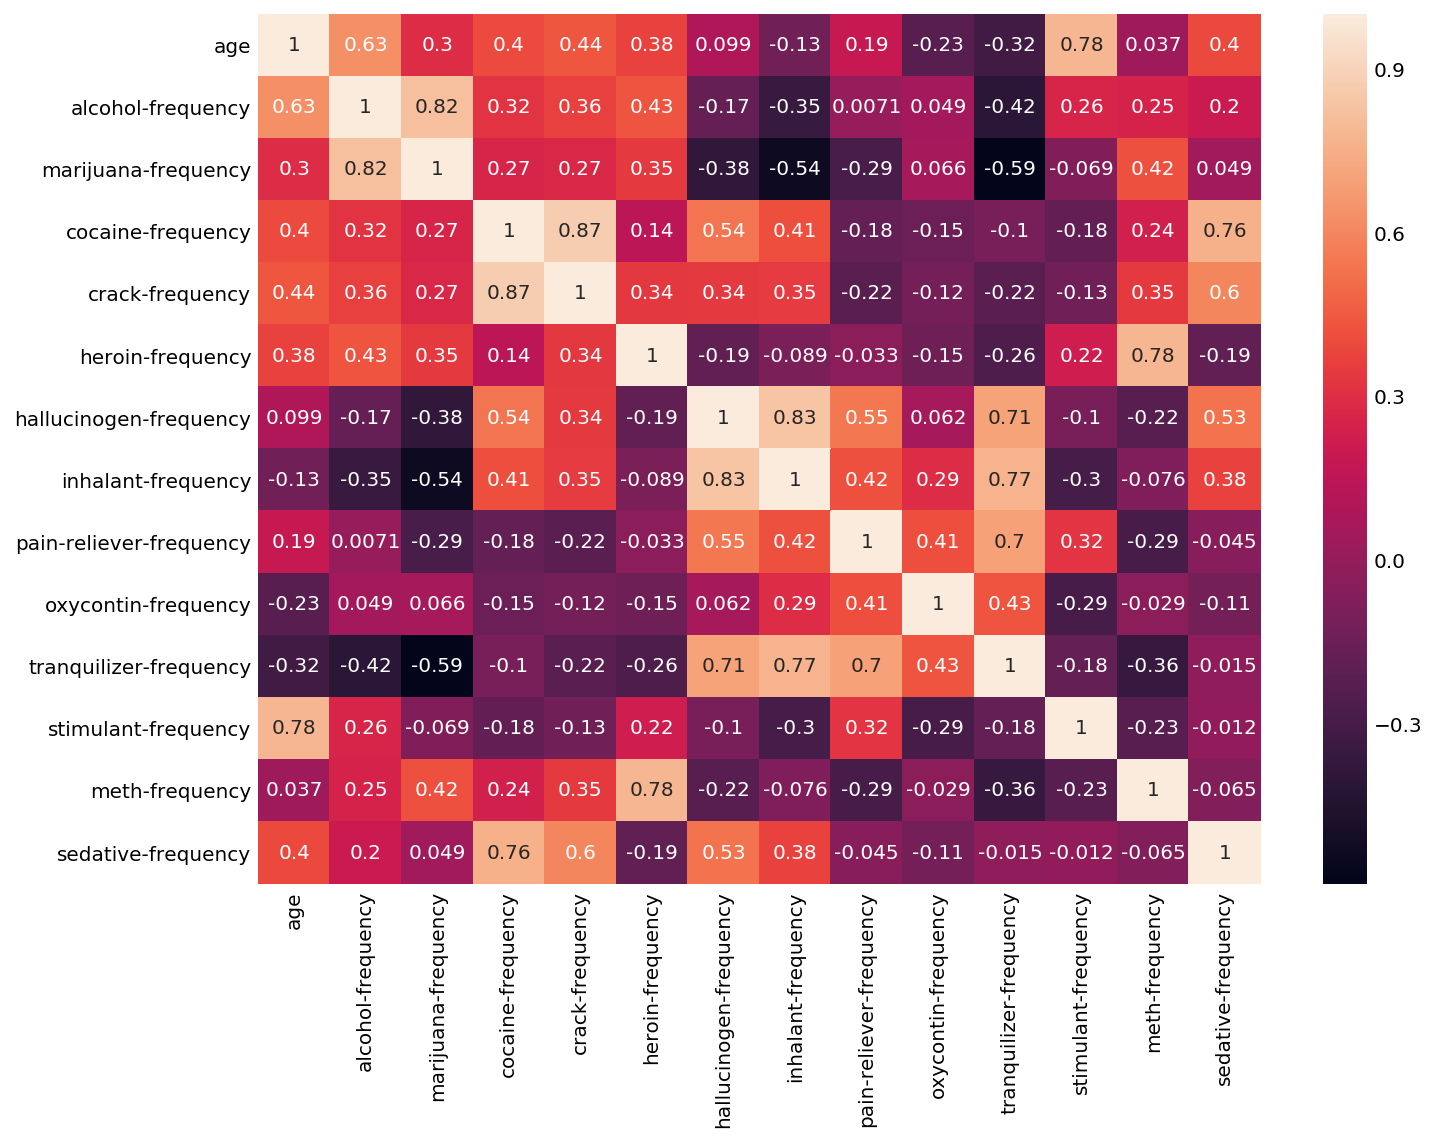

In [59]:
# Check correlation of the variables - frequency, to see if there is any relationship

drug_alt_freq = drug_alt.loc[:,['age','alcohol-frequency','marijuana-frequency',  
                            'cocaine-frequency','crack-frequency','heroin-frequency', 
                            'hallucinogen-frequency','inhalant-frequency','pain-reliever-frequency', 
                            'oxycontin-frequency','tranquilizer-frequency','stimulant-frequency', 
                            'meth-frequency','sedative-frequency']]

plt.figure(figsize = (10,8))
sns.heatmap(drug_alt_freq.corr(), annot=True)

#### <font color='blue'> Observations:

<font color='blue'> 4) It seems that the correlation between frequency of using the different drug is not as strong as the correlation between the percentage of users of different drugs (observed in the earlier heat map plot). There doesn't seem be a clear pattern in the frequency of using different drugs. 
    
5) Age seems to have a general positive effect on frequency of using drugs, however the correlation here is not strong as well. 

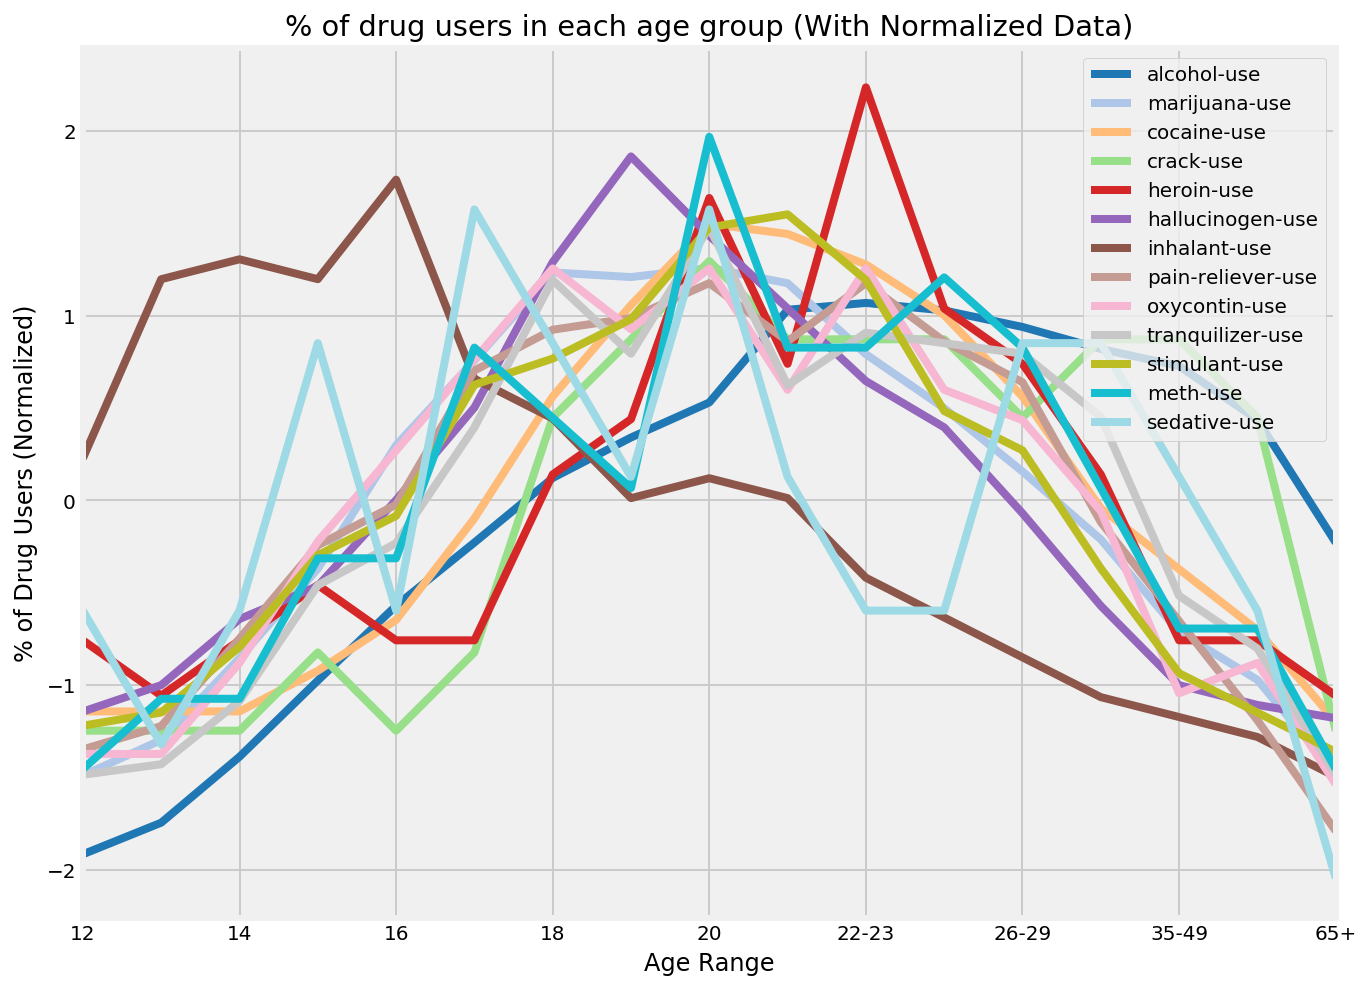

In [60]:
# Plot a line graph to check if there is any obvious pattern in the percentage of users 
# for each drug across the different age groups

drug_norm_use = drug_norm.loc[:,['alcohol-use','marijuana-use',  
                            'cocaine-use','crack-use','heroin-use', 
                            'hallucinogen-use','inhalant-use','pain-reliever-use', 
                            'oxycontin-use','tranquilizer-use','stimulant-use', 
                            'meth-use','sedative-use']]

drug_norm_use.plot(kind='line', figsize=(10,8), rot=0, legend=False, colormap='tab20')
plt.xlabel('Age Range')
plt.ylabel('% of Drug Users (Normalized)')
plt.title('% of drug users in each age group (With Normalized Data)')
plt.legend(loc='upper right')
plt.show()

#### <font color='blue'> Observations:

<font color='blue'> 6) The peak in percentage of drug users for most drugs is around the 18-29 age range. However, the percentage of users for inhalants peaks at 16 years old instead. The percentage of users for inhalants also fall dratically after 16 years old, which is very different compared to the other drugs. ____This again, could be something to look into.____

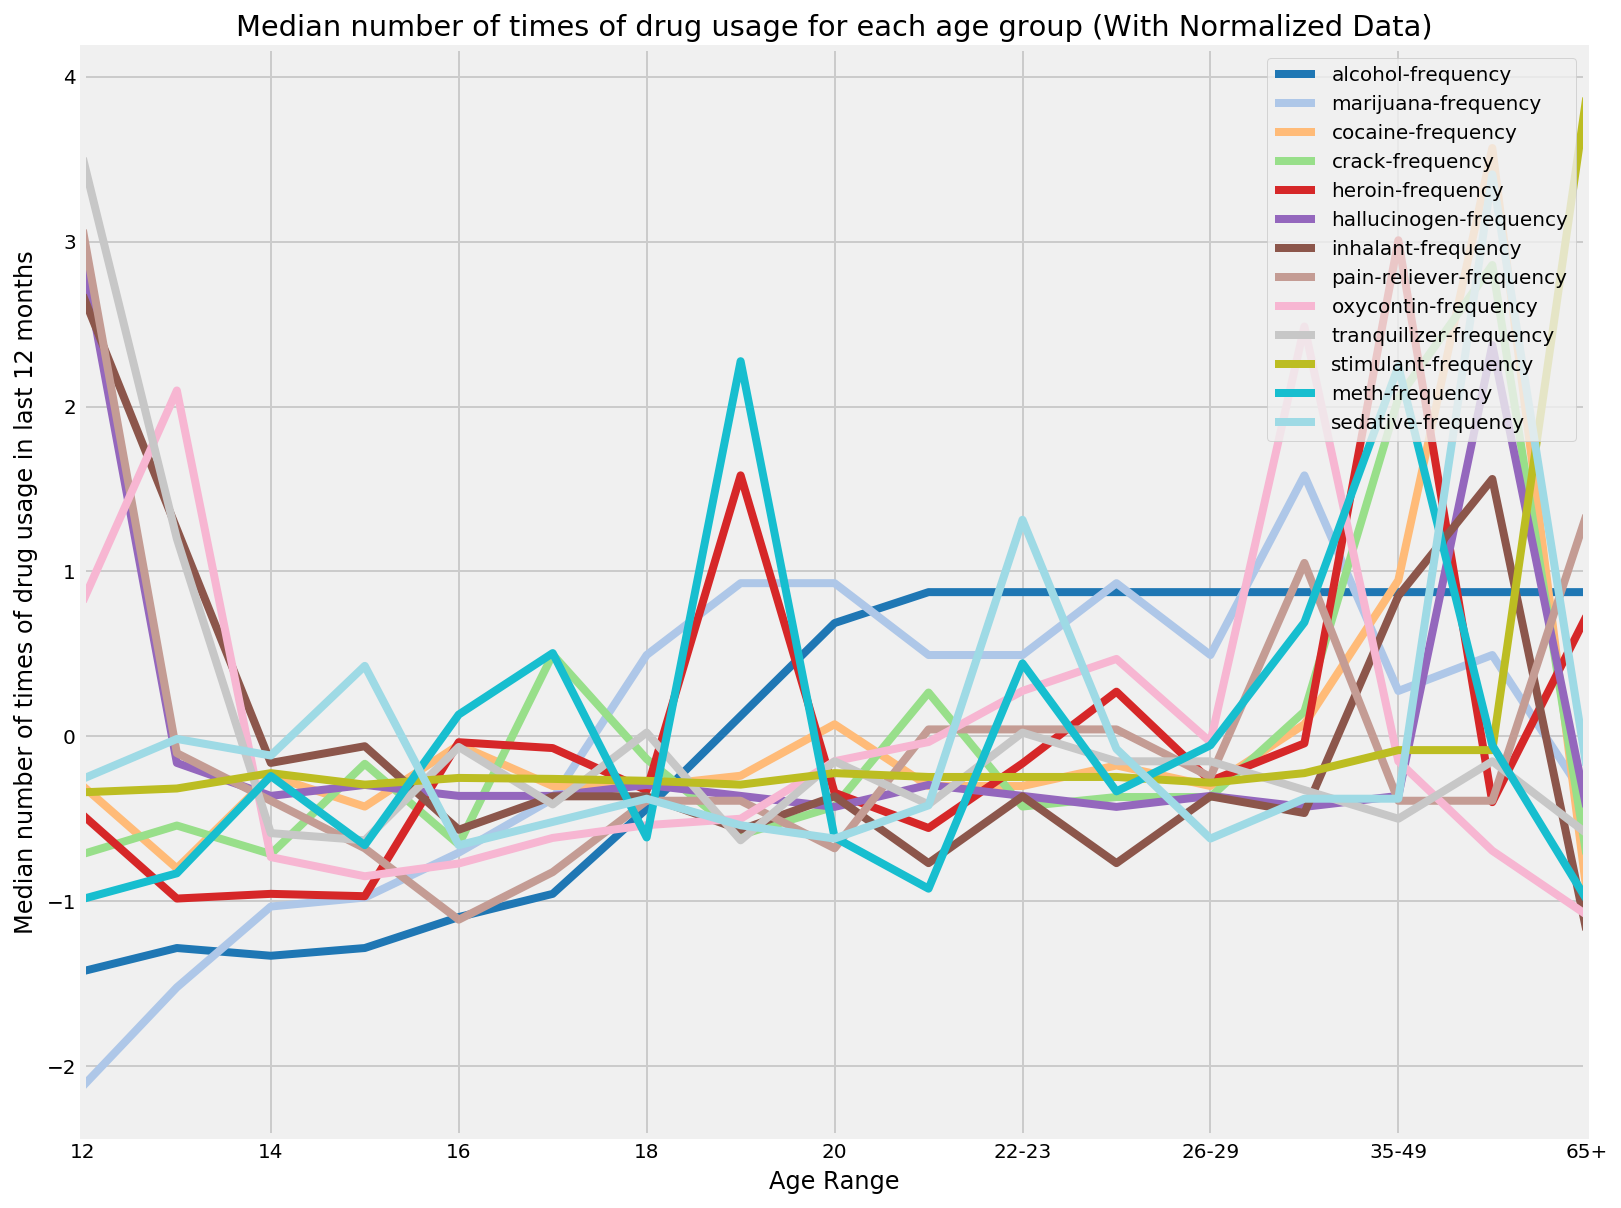

In [61]:
# Plot a line graph to check if there is any obvious pattern in the frequency of use in the past 12  months 
# for each drug across the different age groups

drug_norm_freq = drug_norm.loc[:,['alcohol-frequency','marijuana-frequency',  
                            'cocaine-frequency','crack-frequency','heroin-frequency', 
                            'hallucinogen-frequency','inhalant-frequency','pain-reliever-frequency', 
                            'oxycontin-frequency','tranquilizer-frequency','stimulant-frequency', 
                            'meth-frequency','sedative-frequency']]

drug_norm_freq.plot(kind='line', figsize=(12,10), rot=0, legend=False, colormap='tab20')
plt.xlabel('Age Range')
plt.ylabel('Median number of times of drug usage in last 12 months')
plt.title('Median number of times of drug usage for each age group (With Normalized Data)')
plt.legend(loc='upper right')
plt.show()

#### <font color='blue'> Observations:

<font color='blue'> 7) The pattern of frequency of drug usage doesn't show a very clear pattern for the different drugs, unlike the previous plot (% of drug users for each age group).
    
8) However, it is interesting to note that the frequency of usage for inhalant, hallucinogen, tranquilizer and pain-reliever is very high at 12 years old, and it drops drastically thereafter. The frequency of usage also generally increases after 29 years old. 

In [62]:
### drug_freq = drug.loc[:,['alcohol-frequency','marijuana-frequency',  
                            #'cocaine-frequency','crack-frequency','heroin-frequency', 
                           # 'hallucinogen-frequency','inhalant-frequency','pain-reliever-frequency', 
                           # 'oxycontin-frequency','tranquilizer-frequency','stimulant-frequency', 
                           # 'meth-frequency','sedative-frequency']]

### drug_freq.plot(kind='line', figsize=(10,8), rot=0, legend=False, colormap='tab20')
### plt.xlabel('Age Range')
### plt.ylabel('Drugs used')
### plt.title('% of drug users in each age group')
### plt.legend(loc='upper right')
### plt.show()

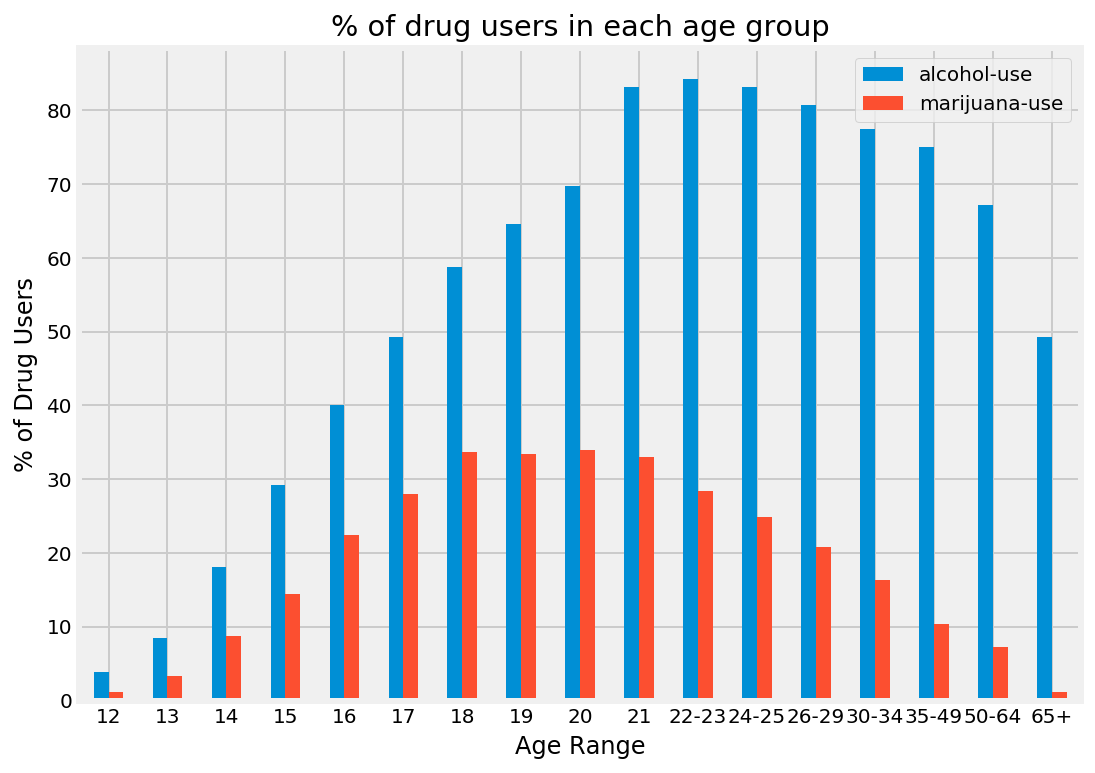

In [63]:
# Plot to check if there may be any trend or relationship for different categories of drugs
# Category of drug: 'Social Drugs' like alcohol and marijuana which are common in the US in social settings

drug_use = drug.loc[:,['age','alcohol-use','marijuana-use']]
drug_use.index = drug_use['age']

drug_use.plot(kind='bar', figsize=(8,6), rot=0)
plt.xlabel('Age Range')
plt.ylabel('% of Drug Users')
plt.title('% of drug users in each age group')
plt.show()

#### <font color='blue'> Observations:

<font color='blue'> 9) There is an increase, peak and decrease pattern for both drugs. However, they peak at different age groups - marijuana peaks around 18-20 years old, while alcohol peaks at 21-23 years old. This is likely because the legal age for alcohol purchase in the US is at 21 years old. 

10) The percentage of drug users is also very high for alcohol (80% at the peak) and relatively high for marijuana (>30% at the peak), which are expected of these 2 common types of drugs.

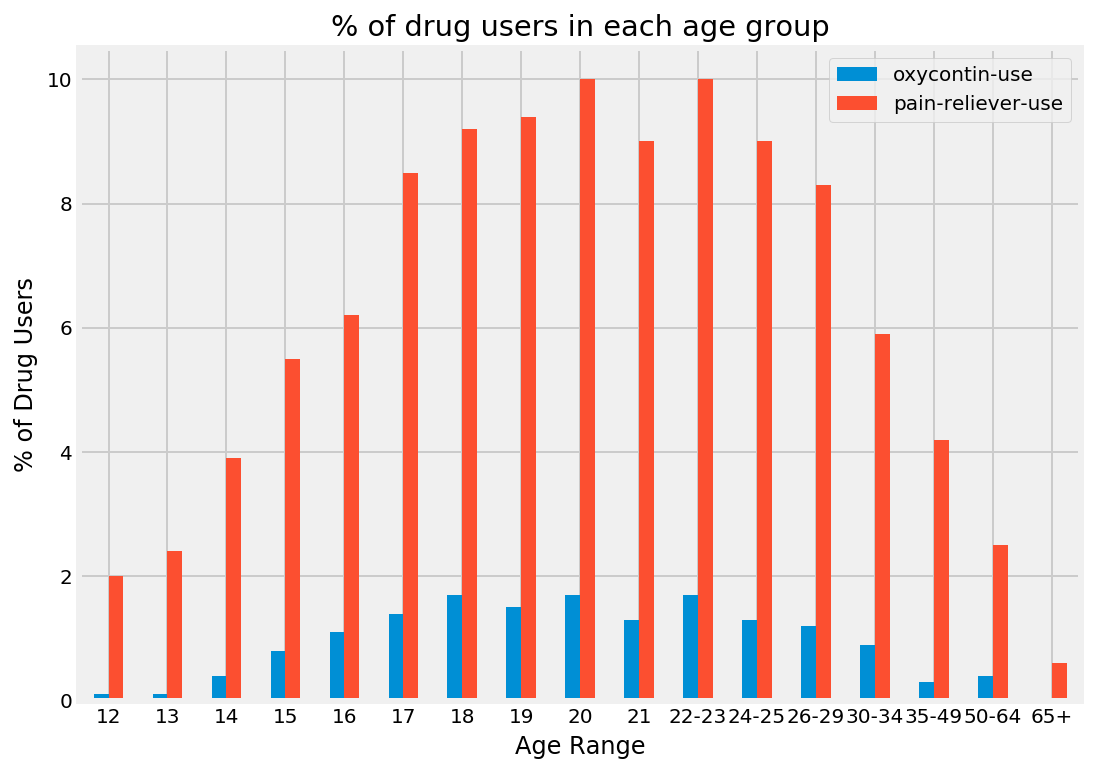

In [64]:
# Plot to check if there may be any trend or relationship for different categories of drugs
# Category of drug: 'Pain-relievers' like oxycontin and pain-reliever which are prescription drugs that may be abused

drug_use = drug.loc[:,['age','oxycontin-use','pain-reliever-use']]
drug_use.index = drug_use['age']

drug_use.plot(kind='bar', figsize=(8,6), rot=0)
plt.xlabel('Age Range')
plt.ylabel('% of Drug Users')
plt.title('% of drug users in each age group')
plt.show()

#### <font color='blue'> Observations:

<font color='blue'> 11) The general trend of oxycontin-use and pain-reliever use seems relatively similar. The percentage of users for these kinds of drugs are lower than the alcohol and marijuana.

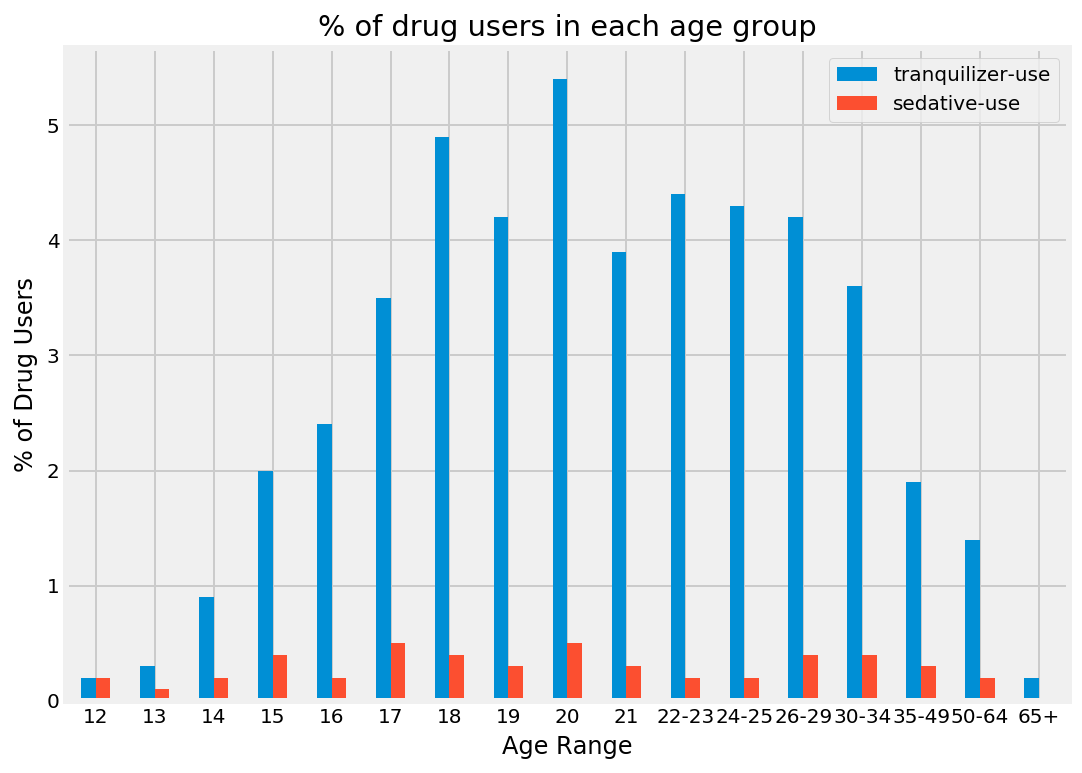

In [65]:
drug_use = drug.loc[:,['age','tranquilizer-use','sedative-use']]
drug_use.index = drug_use['age']

drug_use.plot(kind='bar', figsize=(8,6), rot=0)
plt.xlabel('Age Range')
plt.ylabel('% of Drug Users')
plt.title('% of drug users in each age group')
plt.show()

#### <font color='blue'> Observations:

<font color='blue'> 12) The percentage of users for these drugs (sedative and tranquilizer) are generally lower than other drugs, which may show that these types of drugs are less popular than alcohol & marijuana and oxycontin & pain-relievers. 

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.


**Report**

<font color='blue'> From the observations from the EDA, the variable that raises the most attention is the pattern of inhalant usage. To study it further, I will zoom in on the inhalant-use variable.

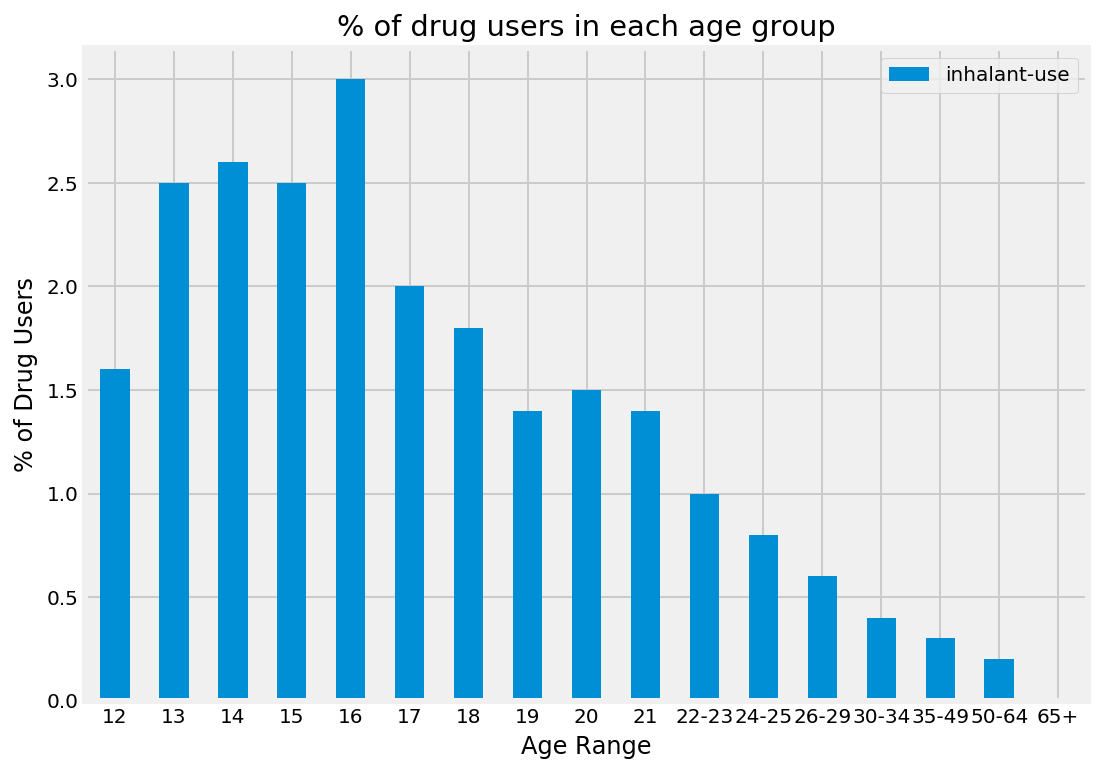

In [66]:
# Check inhalant-use variable

drug_use = drug.loc[:,['age','inhalant-use']]
drug_use.index = drug_use['age']

drug_use.plot(kind='bar', figsize=(8,6), rot=0)
plt.xlabel('Age Range')
plt.ylabel('% of Drug Users')
plt.title('% of drug users in each age group')
plt.show()

<font color='blue'> Inhalant usage peaks very early at 16 years old compared to other drugs. It could be because:
- Inhalants include household products such as spray paint, paint thinners and glues or even stationery such as correction fluids. These are easily availability in households. For the purpose of this study, I will assume that inhalants are mostly made up of household products and stationery
- There is no minimum age for purchase
- They are generally cheap and easily available in hardware stores / supermarkets
- As glues and paints are so commonly used, parents may fail to educate them about the harmful effects of these items and may fail to realize and control their teenagers from using these items as drugs. 
    
I would like to find out if the higher usage of inhalants among teenagers compared to other age groups could be due to the effect of lack of education and control over such items.

Hence, it may make sense to compare inhalant usage to alcohol usage, since alcohol is also readily available. In contrast to inhalants, there is a clear legal age for consumption in the US (18 years old) and purchase (21 years old). More often than not, parents, schools, societal norms and government regulations emphasize that alcohol is off-limits to teenagers, especially those below 18 years old.
   

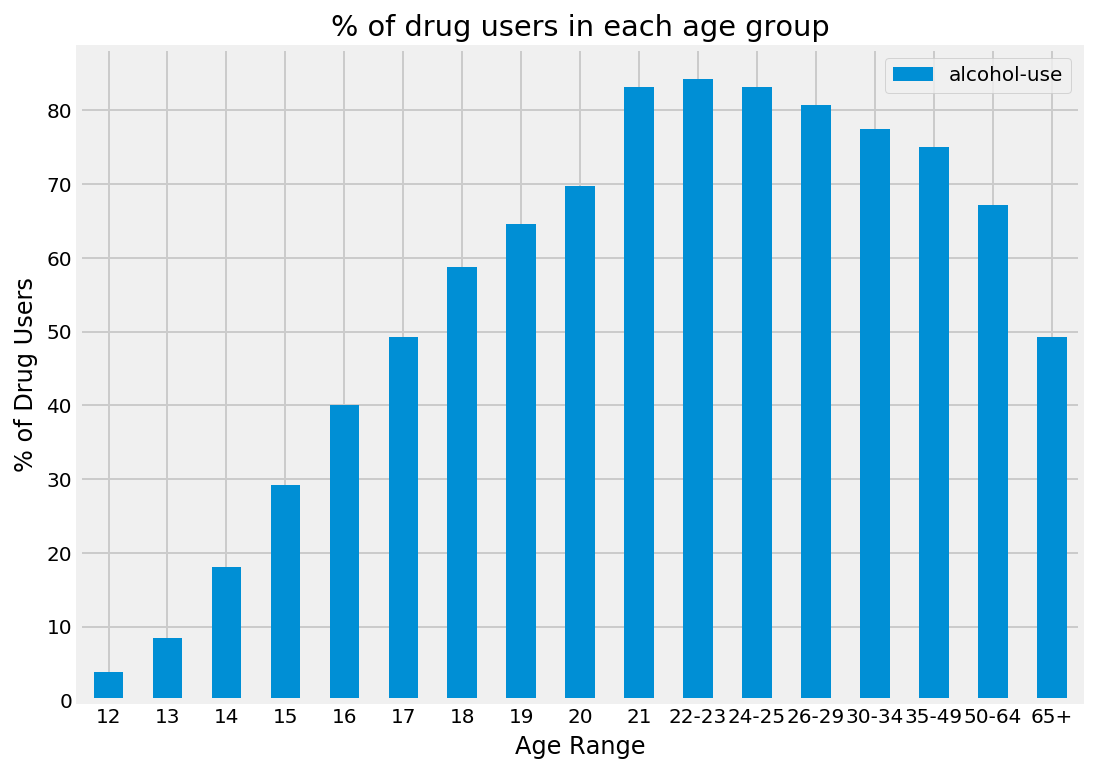

In [67]:
# Check alcohol-use variable

drug_use = drug.loc[:,['age','alcohol-use']]
drug_use.index = drug_use['age']

drug_use.plot(kind='bar', figsize=(8,6), rot=0)
plt.xlabel('Age Range')
plt.ylabel('% of Drug Users')
plt.title('% of drug users in each age group')
plt.show()

<font color='blue'> From the plots above, it seems that there is a difference in trend for percentage of drug users across the age groups for inhalants vs alcohol. Hence, I would like to form the following hypothesis.

#### <font color='blue'> Null hypothesis: There is no difference between inhalants and alcohol for drug user percentage for different age.
       
#### <font color='blue'> Alternate hypothesis: There is a difference between inhalants and alcohol for drug user percentage for different age.

In [68]:
# Create function to split users into 4 different age groups and calculate the number of users of drugs for the age group

def no_of_users(dataframe,drug_use):
    users = []
    users.append(dataframe[drug_use].values[0:6].mean())
    users.append(dataframe[drug_use].values[6:11].mean())
    users.append(dataframe[drug_use].values[11:13].mean())
    users.append(dataframe[drug_use].values[13:].mean())
    return users

In [69]:
# Use the function to create a contingency table to conduct chi square test

inhalant = no_of_users(drug,'inhalant-use')
alcohol = no_of_users(drug,'alcohol-use')

contin = pd.DataFrame([inhalant,alcohol])

In [70]:
# Check the p value to check if the null hypothesis can be rejected

chi2, p, dof, ex = stats.chi2_contingency(contin)
p

0.04181439919154427

#### <font color='blue'> As the p-value is less than 0.05, we can reject the null hypothesis.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [71]:
# Pull out the rate variable from the original sat dataset

sat['Rate'].values

array([82, 81, 79, 77, 72, 71, 71, 69, 69, 68, 67, 65, 65, 63, 60, 57, 56,
       55, 54, 53, 53, 52, 51, 51, 34, 33, 31, 26, 23, 18, 17, 13, 13, 12,
       12, 11, 11,  9,  9,  9,  8,  8,  8,  7,  6,  6,  5,  5,  4,  4,  4,
       45])

<font color='blue'> An outlier is a data point that differs greatly from other values in a data set. Outliers can sometimes affect the outcome of our analysis.
    
<font color='blue'> One way to check if there are outliers is to make use of the 1.5 * Interquartile range rule. If any value is above 1.5 * Interquartile range, it is viewed as an outlier in the dataset. 
    
<font color='blue'> Alternatively, we can try the 2* standard deviation rule

In [72]:
# Check the summary statistic of the variable Rate

sat['Rate'].describe()

count    52.000000
mean     37.153846
std      27.301788
min       4.000000
25%       9.000000
50%      33.500000
75%      63.500000
max      82.000000
Name: Rate, dtype: float64

In [73]:
# Check the interquartile range of the variable Rate

IQR = 63.5 - 9

In [74]:
# Check if any values are outliers using the 1.5*IQR rule

sat[(sat['Rate'] > 63.5+1.5*IQR) | (sat['Rate'] < 9-1.5*IQR)]

# There are no outliers using the 1.5*IQR rule 

,State,Rate,Verbal,Math


In [75]:
# Check if any values are outliers using the 2* Standard deviation rule

sat[(sat['Rate'] > (sat['Rate'].mean() + 2*sat['Rate'].std())) | (sat['Rate'] < (sat['Rate'].mean()-2*sat['Rate'].std()))]

,State,Rate,Verbal,Math


<font color='blue'> There are no outliers. However, the standard deviation should decrease if there are outliers and the outliers are removed.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.